<a href="https://colab.research.google.com/github/wbhaidar/learnai/blob/main/LinearRegression_into.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Linear Regression**

Linear regression is a statistical technique used to model (predict) the relationship between a dependent variable (target) and one or more independent variables (features).

The goal of linear regression is to find a linear equation that best predicts the target variable based on the input features. This is done by minimizing the difference between the predicted values and the actual values, often measured using a method called **least squares**. The resulting model can be represented as:
\[
y = b + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
\]
where \(b\) is the intercept, \(w_1, w_2, \dots, w_n\) are the coefficients (weights), and \(x_1, x_2, \dots, x_n\) are the input features.

Linear regression is widely used in various fields, including finance, biology, engineering, and social sciences, due to its simplicity and interpretability. For example, it can help predict housing prices based on features like square footage, number of rooms, and location. This notebook demonstrates how to implement linear regression using Python with multiple input features and visualizes the relationships between features and the target variable.


The goal is to find the below equation that best fits the data:
- y = w.x + b

where:
- y is the predicted variable
- w is the weight (slope)
- x is the input variable (also called feature)
- b is intercept / bias

To implement linear regression, we need to find the best values of b and w.

This can be be done via:
- normal equation: used for small data sets, for any number of input features.
- gradient descend: used for larger data sets, for any number of input features.
- manual computation: for simple linear regression, where there is only 1 input variable.
- others not detailed here.

# Single feature Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

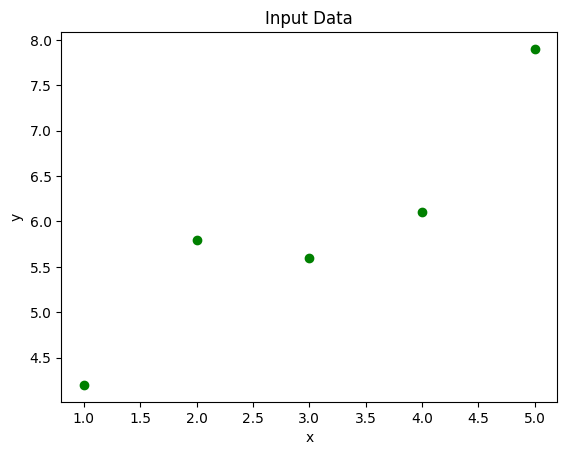

In [ ]:
# Example dataset
x = np.array([1, 2, 3, 4, 5])  # Input feature
y = np.array([4.2, 5.8, 5.6, 6.1, 7.9])  # Output values
plt.title("Input Data")
plt.scatter(x,y, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# Manually computing linear equation
x_mean = np.mean(x)
y_mean = np.mean(y)
w_manual = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
b_manual = y_mean - w_manual * x_mean


# Normal equation computation
X = np.c_[np.ones(x.shape[0]), x]  # Add bias (column of ones)
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
b_normal, w_normal = theta  # Intercept and slope

# Compare results
print(f"Manual Method: w = {w_manual:.2f}, b = {b_manual:.2f}")
print(f"Normal Eqation: w = {w_normal:.2f}, b = {b_normal:.2f}")

Manual Method: w = 0.77, b = 3.61
Normal Eqation: w = 0.77, b = 3.61


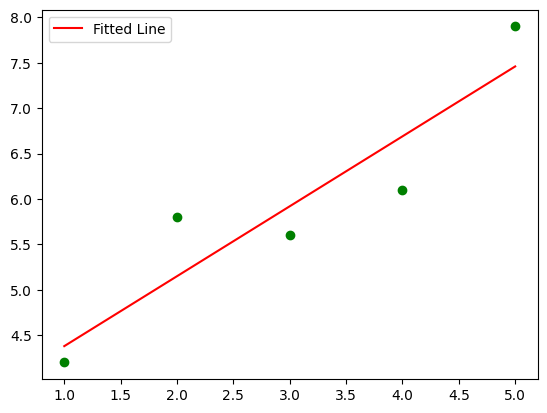

In [ ]:
# Visualize gradient descent result
w=w_normal
b=b_normal
y_pred = w * x + b
plt.scatter(x,y, color='green')
plt.plot(x, y_pred, color="red", label="Fitted Line")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Example dataset
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn
y = np.array([3, 4, 2, 5, 6])

x = np.array([1, 2, 3, 4, 5])  # Input feature
y = np.array([4.2, 5.8, 5.6, 6.1, 7.9])  # Output values
x_reshaped=x.reshape(-1,1)

print(f'x: {x}, x_reshaped {x_reshaped}')

x: [1 2 3 4 5], x_reshaped [[1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
# Fit the model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the slope and intercept
w = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print(f"Slope (w): {w}")
print(f"Intercept (b): {b}")

# Predict values
y_pred = model.predict(x_reshaped)
print("Original y:",y)
print("Predicted y:", y_pred)

Slope (w): 0.7700000000000001
Intercept (b): 3.6099999999999994
Original y: [4.2 5.8 5.6 6.1 7.9]
Predicted y: [4.38 5.15 5.92 6.69 7.46]


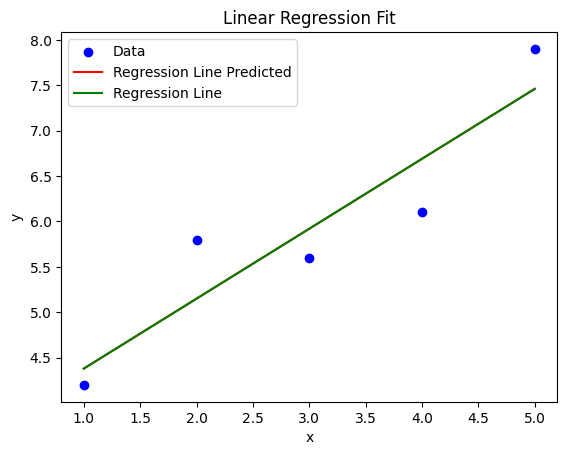

In [ ]:
y_pred2 = w * x + b
# Plot original data
plt.scatter(x, y, color="blue", label="Data")
# Plot the regression line
plt.plot(x, y_pred, color="red", label="Regression Line Predicted")
plt.plot(x, y_pred, color="green", label="Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Multi feature linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Step 1: Example Dataset
# Three feature variables (X1, X2, X3) and target variable (y)
X1 = np.array([1, 2, 3, 4, 5])  # Input feature 1
y = np.array([4.2, 5.8, 5.6, 6.1, 7.9])  # Output values
X2 = np.array([2, 3, 6, 8, 10])  # input feature 2
X3 = np.array([5, 7, 9, 11, 13])  # input feature 3



# Example Dataset
##X1 = np.array([1, 2, 3, 4, 5])  # Feature 1
##X2 = np.array([1, 4, 6, 8, 10])  # Feature 2
##X3 = np.array([5, 7, 9, 11, 13])  # Feature 3
##y = np.array([1.1, 2.3, 3.0, 4.8, 5.4])  # Target variable



# Step 2: Design Matrix
# Add a bias term (column of ones) and combine all features into matrix X
X = np.c_[np.ones(X1.shape[0]), X1, X2, X3]  # Shape (5, 4)

# Step 3: Calculate Regression Coefficients using Normal Equation
# θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)  # Regression coefficients
b, w1, w2, w3 = theta  # Intercept and slopes for X1, X2, and X3

print(f"Intercept (b): {b:.2f}")
print(f"Coefficient for x1 (w1): {w1:.2f}")
print(f"Coefficient for x2 (w2): {w2:.2f}")
print(f"Coefficient for x3 (w3): {w3:.2f}")

# Step 4: Predict Values
y_pred = X @ theta  # Predicted values
print("Predicted y:", y_pred)



Intercept (b): 20.00
Coefficient for x1 (w1): 2.00
Coefficient for x2 (w2): -0.93
Coefficient for x3 (w3): -1.50
Predicted y: [12.64285714 10.71428571  6.92857143  4.07142857  1.21428571]


In [ ]:
plt.scatter(X1, y, color="blue", label="Feature 1 (X1)", marker="o")
plt.scatter(X2, y, color="green", label="Feature 2 (X2)", marker="s")
plt.scatter(X3, y, color="orange", label="Feature 3 (X3)", marker="^")

plt.plot(X1, b + w1 * X1 + w2 * X2.mean() + w3 * X3.mean(), color="blue", linestyle="--", label="Fit Line for X1")
plt.plot(X2, b + w1 * X1.mean() + w2 * X2 + w3 * X3.mean(), color="green", linestyle="--", label="Fit Line for X2")
plt.plot(X3, b + w1 * X1.mean() + w2 * X2.mean() + w3 * X3, color="orange", linestyle="--", label="Fit Line for X3")


plt.xlabel("Feature Value")
plt.ylabel("Target (y)")
plt.title("All Features on One Graph")
plt.legend()
plt.show()

In [ ]:
# Visualization - Projections for Individual Features
plt.figure(figsize=(18, 6))

# Feature 1 vs Target
plt.subplot(1, 3, 1)
plt.scatter(X1, y, color="blue", label="Actual Data")
plt.scatter(X1, y_pred, color="red", label="Predicted Data")
plt.plot(X1, b + w1 * X1 + w2 * X2.mean() + w3 * X3.mean(), color="green", label="Fit Line")
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Target (y)")
plt.title("Feature 1 vs Target")
plt.legend()

# Feature 2 vs Target
plt.subplot(1, 3, 2)
plt.scatter(X2, y, color="blue", label="Actual Data")
plt.scatter(X2, y_pred, color="red", label="Predicted Data")
plt.plot(X2, b + w1 * X1.mean() + w2 * X2 + w3 * X3.mean(), color="green", label="Fit Line")
plt.xlabel("Feature 2 (X2)")
plt.ylabel("Target (y)")
plt.title("Feature 2 vs Target")
plt.legend()

# Feature 3 vs Target
plt.subplot(1, 3, 3)
plt.scatter(X3, y, color="blue", label="Actual Data")
plt.scatter(X3, y_pred, color="red", label="Predicted Data")
plt.plot(X3, b + w1 * X1.mean() + w2 * X2.mean() + w3 * X3, color="green", label="Fit Line")
plt.xlabel("Feature 3 (X3)")
plt.ylabel("Target (y)")
plt.title("Feature 3 vs Target")
plt.legend()

plt.tight_layout()
plt.show()